## MTH9893 Time Series Analysis HW4
* Group 01
* Author: Pan, Hongchao & Sun, Yu
* Kernel version: **R 3.3.2**
* **Packages: urca, vars,strucchange, readxl, sandwich, lmtest, tseries, MASS, repr and zoo**
* Data: End of day price of three front crude oil future contracts over past 5 years, i.e., CL1 Comdty, CL2 Comdty and CL3 Comdty.
* Notes: 
    * **Please install the packages listed above if your kernel does not have them** before running the notebook
    * Using ca.jo() function in package ***urca*** to retrive Johansen cointegration test
    * Using adf.test() function in package ***tseries*** for stationary test
    * No good package of Johansen cointegration test has been implemented in Python now
    
    * Test guildline:
        * Step 1: Chose the lag of VAR(p) model, (also the parameter K in ca.jo() function)
        * Step 2: Johansen trace cointegration test
        * Step 3: VECM stationary test
    
    * The running time of this notebook is around 2s

In [1]:
# install urca packages if does not have
#install.packages("urca")
# Does not work in the jupyter in macbook
# The above installation function retrive the package with .tar.gz, 
# but for macbook binraries it is .tgz and .zip for windows
# Thereore install the packages mannually with following steps:
# Step1: download corresponding binraries: .tgz or .zip
# Step2: unzip the binraries
# Step3: copy the folder to the R library under anaconda,
#        e.g., my location in Macbook is: ~/anaconda/lib/R/library
#              ~ standars for Users/your_user_name
# Step4: use the library as following way

#Same as urca
#install.packages("vars") 
#install.packages("tseries")
#install.packages("readxl")
#install.packages("sandwich")
#install.packages("strucchange")
#install.packages("lmtest")


# Load libraries
library(urca)
library(sandwich)    # vars required
library(zoo)         # sandwich required
library(MASS)     # vars required MASS
library(strucchange) # vars required
library(lmtest)      # vars required
library(vars)        # for VARselect() function
library(readxl)   # read_excel() function
library(repr)    # For changing plot features
library(tseries) # For ADF test


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
# Record the total running time of this notebook
# Starting record the time
ptm<-proc.time()

In [3]:
# Read the data form excel file
# Reference: https://cran.r-project.org/web/packages/readxl/readxl.pdf
df<- read_excel("CLs_Daily.xlsx",sheet = 1,col_names = TRUE, skip = 1)
colnames(df)<- c('Date','CL1_PX_LAST','Date2','CL2_PX_LAST','Date3','CL3_PX_LAST')
# Remove redundency date
vars<- c("Date","CL1_PX_LAST","CL2_PX_LAST","CL3_PX_LAST")
df_CLs<- df[vars]
head(df_CLs)

Date,CL1_PX_LAST,CL2_PX_LAST,CL3_PX_LAST
2012-03-02,106.70,107.17,107.64
2012-03-05,106.72,107.18,107.63
2012-03-06,104.70,105.21,105.75
2012-03-07,106.16,106.65,107.18
2012-03-08,106.58,107.06,107.56
2012-03-09,107.40,107.87,108.33


Table 1. Overview of end of day price of three front crude oil future contracts

#### Choose the lag of VAR(p) model for the next Johansen cointegration test

* Reference: https://cran.r-project.org/web/packages/vars/vars.pdf 
* P47 VARselect() function

In [4]:
# Select the lag of VAR(p) model
# Set the maxlags=30, since the running time is fast due to 
# VARselect uses OLS not MLE
lagRes<- VARselect(df_CLs[,c("CL1_PX_LAST","CL2_PX_LAST","CL3_PX_LAST")],
                  lag.max=30)
lagRes

,1,2,3,4,5,6,7,8,9,10,⋯,21,22,23,24,25,26,27,28,29,30
AIC(n),-8.6204708619,-8.6792042482,-8.6821557484,-8.6815716386,-8.6788004698,-8.685347300,-8.6903872440,-8.6869865021,-8.686055795,-8.6798550684,⋯,-8.6325395928,-8.6348288625,-8.6771862967,-8.670338017,-8.6596282574,-8.6486315059,-8.640017385,-8.63040821,-8.6217141839,-8.6114308517
HQ(n),-8.6016967579,-8.6463495663,-8.6352204885,-8.6205558008,-8.6037040540,-8.596170306,-8.5871296722,-8.5696483524,-8.554637067,-8.5343557628,⋯,-8.3321539297,-8.3203626214,-8.3486394776,-8.327710620,-8.3029202824,-8.2778429529,-8.255148254,-8.23145851,-8.2086838970,-8.1843199868
SC(n),-8.5705706721,-8.5918789162,-8.5574052740,-8.5193960219,-8.4791997108,-8.448321398,-8.4159362004,-8.3751103163,-8.336754467,-8.2931285979,⋯,-7.8341365570,-7.7990006844,-7.8039329763,-7.759659555,-7.7115246524,-7.6631027585,-7.617063496,-7.57002918,-7.5239100096,-7.4762015351
FPE(n),0.0001803753,0.0001700864,0.0001695853,0.0001696846,0.0001701558,0.000169046,0.0001681968,0.0001687707,0.000168929,0.0001699811,⋯,0.0001782618,0.0001778616,0.0001704929,0.000171673,0.0001735308,0.0001754599,0.000176989,0.00017871,0.0001802836,0.0001821613


Table 2. Lag selecting results of VAR(p) model with maxlags=30

#### Johansen trace cointegration test for multivariate time series

* Choose **VAR(7)** model based on the AIC results from table 2
* VECM type: longrun
* Reference: https://cran.r-project.org/web/packages/urca/urca.pdf
* P10-P11 ca.jo() function

In [5]:
# Johansen trace test
ciRes<- ca.jo(x=df_CLs[,c("CL1_PX_LAST","CL2_PX_LAST","CL3_PX_LAST")],
             type='trace',K=7,spec='longrun')
summary(ciRes)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.027955783 0.009167288 0.001404094

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  1.76  6.50  8.18 11.65
r <= 1 | 13.30 15.66 17.95 23.52
r = 0  | 48.83 28.71 31.52 37.22

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               CL1_PX_LAST.l7 CL2_PX_LAST.l7 CL3_PX_LAST.l7
CL1_PX_LAST.l7      1.0000000        1.00000      1.0000000
CL2_PX_LAST.l7     -1.8581130      -26.53851     -1.5975899
CL3_PX_LAST.l7      0.8556115       26.07948      0.7672858

Weights W:
(This is the loading matrix)

              CL1_PX_LAST.l7 CL2_PX_LAST.l7 CL3_PX_LAST.l7
CL1_PX_LAST.d     -0.2721365   0.0016155050    -0.01024643
CL2_PX_LAST.d     -0.1686680   0.0014719817    -0.01042902
CL3_PX_LAST.d     -0.1409623   0.0008585245    -0.01033982


Table 3. Johansen trace cointegration test results of front crude oil future contracts

#### Interpretation of the Johansen trace cointegration test results

* Reference: https://www.quantstart.com/articles/Johansen-Test-for-Cointegrating-Time-Series-Analysis-in-R

1. The largest eigenvalue is around 0.028

2. For first hypothesis, $r$=0, tests for the presence of cointegration.
    
    * It is clear that since the test statistic exceeds the 1% level significantly (48.83>37.22) that we have strong evidence to **reject the null hypothesis of no cointegration, i.e., there is cointegration between CLs**.

3. Second hypothesis, $r$=1
    
    * The second test for $r \le 1$ against the alternative hypothesis of $r>1$ also provides clear evidence to **accept $r \le 1$ **since the test statistic **does not exceed the 1% level (13.30<23.52)**
 
4. Therefore, three front crude oil future contracts conintegrated with rank 1

#### Analyze VECM after confirm the cointegration rank is 1

* From the results above in table 3, we found that the largest eigenvalue is 1st eigenvalue, 0.027955783. Therefore the corresponding coefficients of eigenvectors (CL1_PX_LAST,CL2_PX_LAST,CL3_PX_LAST) are the first column (also showed in the results, *'Eigenvectors, normalised to first column')

* Use the coefficients (1.0000000, -1.8581130, 0.8556115) to construct the linear combination of three crude oil future contracts as following:

In [6]:
vecm<- 1*df_CLs[,'CL1_PX_LAST'] -1.8581130*df_CLs[,'CL2_PX_LAST'] +
0.8556115*df_CLs[,'CL3_PX_LAST']

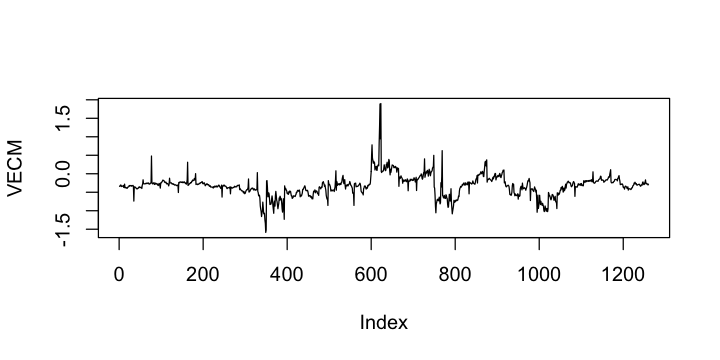

In [7]:
# Plot the time series
options(repr.plot.height=3, repr.plot.width=6)
plot(vecm,type='l',ylab='VECM')

Figure 1. VECM plot formed from CL1, CL2, and CL3 end of day price time series

Visually this looks like a stationary time series, we import the Augmented Dickey-Fuller (ADF) test as an additional check:

In [8]:
adfRes<- adf.test(vecm)
adfRes


	Augmented Dickey-Fuller Test

data:  vecm
Dickey-Fuller = -3.8672, Lag order = 10, p-value = 0.01563
alternative hypothesis: stationary


Table 3. ADF test results of VECM

ADF test result is consistent with the visually look, i.e., the VECM formed from linear combination with coefficients from Johansen trace conintegration test is stationary.

### Final results of Q1

* Three front crude oil future contracts has conintegration with rank = 1
<br><br>

* The largest eigenvalue is 0.027955783
<br><br>

* VECM formed from linear combination of CL1_PX_LAST, CL2_PX_LAST, CL3_PXLAST is stationary

In [9]:
# End recording the running time
print('The running time of this notebooks is: ')
proc.time()-ptm

[1] "The running time of this notebooks is: "


   user  system elapsed 
  0.880   0.094   1.699 